In [67]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

In [68]:
df=pd.read_csv('~/Downloads/train.csv')

In [69]:
import seaborn as sns

In [70]:
train=df[['premise', 'hypothesis', 'label']]

/Users/jeffreyng/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


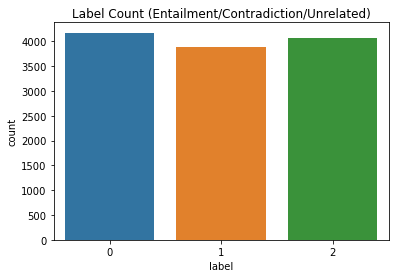

In [71]:
#showing class breakdown (there is no class imbalance)
sns.countplot(train.label)
plt.title('Label Count (Entailment/Contradiction/Unrelated)')
plt.savefig('DearWatson.png')

In [6]:
from bert_serving.client import BertClient

ModuleNotFoundError: No module named 'bert_serving.client'

In [7]:
bc = BertClient(ip='192.168.1.223')

NameError: name 'BertClient' is not defined

In [148]:
embedding = bc.encode(["I love data science and analytics vidhya."])
# check the shape of embedding, it should be 1x768
print(embedding.shape)


NameError: name 'bc' is not defined

In [41]:
import re

In [42]:
# clean text from noise
def clean_text(text):
    # filter to allow only alphabets
    text = re.sub(r'[^a-zA-Z\']', ' ', text)
    
    # remove Unicode characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    
    # convert to lowercase to maintain consistency
    text = text.lower()
       
    return text

In [43]:
train.shape

(12120, 3)

In [44]:
train['clean_premise']= [clean_text(x) for x in train.loc[:, ('premise')]]

/var/folders/48/3rfqt3q17zj4zsvn_9rh50br0000gn/T/ipykernel_46993/4246234665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['clean_premise']= [clean_text(x) for x in train.loc[:, ('premise')]]


In [45]:
train['clean_hypothesis']=[clean_text(x) for x in train.loc[:, ('hypothesis')]]

/var/folders/48/3rfqt3q17zj4zsvn_9rh50br0000gn/T/ipykernel_46993/3487859159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['clean_hypothesis']=[clean_text(x) for x in train.loc[:, ('hypothesis')]]


In [46]:
train

,premise,hypothesis,label,clean_premise,clean_hypothesis
0,and these comments were considered in formulat...,The rules developed in the interim were put to...,0,and these comments were considered in formulat...,the rules developed in the interim were put to...
1,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,2,these are issues that we wrestle with in pract...,practice groups are not permitted to work on t...
2,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,0,des petites choses comme celles l font une di...,j'essayais d'accomplir quelque chose
3,you know they can't really defend themselves l...,They can't defend themselves because of their ...,0,you know they can't really defend themselves l...,they can't defend themselves because of their ...
4,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,1,...,
...,...,...,...,...,...
12115,The results of even the most well designed epi...,All studies have the same amount of uncertaint...,2,the results of even the most well designed epi...,all studies have the same amount of uncertaint...
12116,But there are two kinds of the pleasure of do...,But there are two kinds of the pleasure of doi...,0,but there are two kinds of the pleasure of do...,but there are two kinds of the pleasure of doi...
12117,The important thing is to realize that it's wa...,"It cannot be moved, now or ever.",2,the important thing is to realize that it's wa...,it cannot be moved now or ever
12118,At the west end is a detailed model of the who...,The model temple complex is at the east end.,2,at the west end is a detailed model of the who...,the model temple complex is at the east end


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
train

,premise,hypothesis,label,clean_premise,clean_hypothesis
0,and these comments were considered in formulat...,The rules developed in the interim were put to...,0,and these comments were considered in formulat...,the rules developed in the interim were put to...
1,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,2,these are issues that we wrestle with in pract...,practice groups are not permitted to work on t...
2,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,0,des petites choses comme celles l font une di...,j'essayais d'accomplir quelque chose
3,you know they can't really defend themselves l...,They can't defend themselves because of their ...,0,you know they can't really defend themselves l...,they can't defend themselves because of their ...
4,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,1,...,
...,...,...,...,...,...
12115,The results of even the most well designed epi...,All studies have the same amount of uncertaint...,2,the results of even the most well designed epi...,all studies have the same amount of uncertaint...
12116,But there are two kinds of the pleasure of do...,But there are two kinds of the pleasure of doi...,0,but there are two kinds of the pleasure of do...,but there are two kinds of the pleasure of doi...
12117,The important thing is to realize that it's wa...,"It cannot be moved, now or ever.",2,the important thing is to realize that it's wa...,it cannot be moved now or ever
12118,At the west end is a detailed model of the who...,The model temple complex is at the east end.,2,at the west end is a detailed model of the who...,the model temple complex is at the east end


### USE CLS

In [49]:
train["combined"] = '[CLS]' + train["premise"] + '[SEP]' + '[CLS]' + train["hypothesis"]

In [56]:
train.combined[1]

'[CLS]These are issues that we wrestle with in practice groups of law firms, she said. [SEP][CLS]Practice groups are not permitted to work on these issues.'

In [57]:
import tensorflow as tf

In [65]:
from transformers import BertTokenizer, TFBertForSequenceClassification, TFBertModel


tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = TFBertModel.from_pretrained('bert-base-multilingual-cased')

def encode_sentence(s):
    tokens = list(tokenizer.tokenize(s))
    tokens.append('[SEP]')
    return tokenizer.convert_tokens_to_ids(tokens)

ValueError: got_ver is None

In [59]:
encode_sentence

NameError: name 'encode_sentence' is not defined

In [ ]:
def bert_encode(hypotheses, premises, tokenizer):
    
    num_examples = len(hypotheses)
  
    sentence1 = tf.ragged.constant([
        encode_sentence(s)
        for s in np.array(hypotheses)])
    sentence2 = tf.ragged.constant([
        encode_sentence(s)
        for s in np.array(premises)])

    cls = [tokenizer.convert_tokens_to_ids(['[CLS]'])]*sentence1.shape[0]
    input_word_ids = tf.concat([cls, sentence1, sentence2], axis=-1)

    input_mask = tf.ones_like(input_word_ids).to_tensor()

    type_cls = tf.zeros_like(cls)
    type_s1 = tf.zeros_like(sentence1)
    type_s2 = tf.ones_like(sentence2)
    input_type_ids = tf.concat(
        [type_cls, type_s1, type_s2], axis=-1).to_tensor()

    inputs = {
      'input_word_ids': input_word_ids.to_tensor(),
      'input_mask': input_mask,
      'input_type_ids': input_type_ids}

    return inputs

In [ ]:
train_input = bert_encode(train.premise.values, train.hypothesis.values, tokenizer)

In [ ]:
max_len = 259

def build_model():
    bert_encoder = TFBertModel.from_pretrained('bert-base-multilingual-cased')
    input_word_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    input_type_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_type_ids")
    
    embedding = bert_encoder([input_word_ids, input_mask, input_type_ids])[0]
    output = tf.keras.layers.Dense(3, activation='softmax')(embedding[:,0,:])
    
    model = tf.keras.Model(inputs=[input_word_ids, input_mask, input_type_ids], outputs=output)
    model.compile(tf.keras.optimizers.Adam(lr=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:

model = build_model()
model.summary()


In [1]:
model.fit(train_input, train.label.values, epochs = 2, verbose = 1, batch_size = 64, validation_split = 0.2, workers=-1)

NameError: name 'model' is not defined

In [41]:
inputs=[]
for i in range(12120):
    inputs.append(tokenizer(stringz[0], return_tensors="tf", padding=True, truncation=True))

In [140]:

X_tr=np.array(X_tr).reshape(9090, 3, -1)

In [106]:
X_tr[0]['input_ids']

<tf.Tensor: shape=(1, 32), dtype=int32, numpy=
array([[  101,   101,  1105,  1292,  7640,  1127,  1737,  1107,  7893,
         1916,  1103, 10572,  2995,   119,   102,  1109,  2995,  1872,
         1107,  1103, 10572,  1127,  1508,  1487,  1114,  1292,  7640,
         1107,  1713,   119,   102,   102]], dtype=int32)>

In [111]:
X_tr, X_val, y_tr, y_val = train_test_split(train.combined, train.label, test_size=0.25, random_state=42)

In [112]:
# from bert_serving.client import BertClient

# make a connection with the BERT server using it's ip address

# get the embedding for train and val sets
X_tr_bert = bc.encode(X_tr.tolist())
X_val_bert = bc.encode(X_val.tolist())

/Users/jeffreyng/miniforge3/envs/myenv/lib/python3.9/site-packages/bert_serving/client/__init__.py:294: UserWarning: some of your sentences have more tokens than "max_seq_len=25" set on the server, as consequence you may get less-accurate or truncated embeddings.
here is what you can do:
- disable the length-check by create a new "BertClient(check_length=False)" when you do not want to display this warning
- or, start a new server with a larger "max_seq_len"
  warnings.warn('some of your sentences have more tokens than "max_seq_len=%d" set on the server, '


In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [114]:
clf = RandomForestClassifier(warm_start=True, oob_score=True, n_estimators=2000, max_depth=6, criterion='entropy', min_samples_split=9, random_state=0, verbose=3, n_jobs=-1)


In [115]:
clf.fit(X_tr_bert, y_tr)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.


building tree 1 of 2000
building tree 2 of 2000
building tree 3 of 2000building tree 4 of 2000building tree 5 of 2000


building tree 6 of 2000building tree 7 of 2000building tree 8 of 2000
building tree 9 of 2000


building tree 10 of 2000
building tree 11 of 2000building tree 12 of 2000building tree 13 of 2000building tree 14 of 2000



building tree 15 of 2000building tree 16 of 2000
building tree 17 of 2000

building tree 18 of 2000
building tree 19 of 2000
building tree 20 of 2000
building tree 21 of 2000
building tree 22 of 2000
building tree 23 of 2000
building tree 24 of 2000
building tree 25 of 2000
building tree 26 of 2000building tree 27 of 2000

building tree 28 of 2000
building tree 29 of 2000
building tree 30 of 2000
building tree 31 of 2000
building tree 32 of 2000
building tree 33 of 2000
building tree 34 of 2000
building tree 35 of 2000
building tree 36 of 2000
building tree 37 of 2000
building tree 38 of 2000building tree 39 of 2000

building tree 40 of 2000


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s


building tree 41 of 2000
building tree 42 of 2000
building tree 43 of 2000building tree 44 of 2000

building tree 45 of 2000
building tree 46 of 2000
building tree 47 of 2000
building tree 48 of 2000
building tree 49 of 2000building tree 50 of 2000

building tree 51 of 2000
building tree 52 of 2000
building tree 53 of 2000
building tree 54 of 2000
building tree 55 of 2000building tree 56 of 2000

building tree 57 of 2000building tree 58 of 2000

building tree 59 of 2000
building tree 60 of 2000
building tree 61 of 2000building tree 62 of 2000
building tree 63 of 2000

building tree 64 of 2000
building tree 65 of 2000
building tree 66 of 2000
building tree 67 of 2000
building tree 68 of 2000
building tree 69 of 2000
building tree 70 of 2000
building tree 71 of 2000
building tree 72 of 2000
building tree 73 of 2000
building tree 74 of 2000
building tree 75 of 2000
building tree 76 of 2000
building tree 77 of 2000
building tree 78 of 2000
building tree 79 of 2000
building tree 80 of 2000


[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    1.3s


building tree 119 of 2000
building tree 120 of 2000building tree 121 of 2000

building tree 122 of 2000
building tree 123 of 2000
building tree 124 of 2000
building tree 125 of 2000
building tree 126 of 2000
building tree 127 of 2000
building tree 128 of 2000
building tree 129 of 2000
building tree 130 of 2000
building tree 131 of 2000
building tree 132 of 2000
building tree 133 of 2000
building tree 134 of 2000
building tree 135 of 2000building tree 136 of 2000

building tree 137 of 2000
building tree 138 of 2000
building tree 139 of 2000building tree 140 of 2000

building tree 141 of 2000
building tree 142 of 2000
building tree 143 of 2000
building tree 144 of 2000
building tree 145 of 2000
building tree 146 of 2000
building tree 147 of 2000
building tree 148 of 2000
building tree 149 of 2000
building tree 150 of 2000
building tree 151 of 2000
building tree 152 of 2000
building tree 153 of 2000
building tree 154 of 2000
building tree 155 of 2000
building tree 156 of 2000
building tre

[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    3.2s


building tree 293 of 2000
building tree 294 of 2000building tree 295 of 2000

building tree 296 of 2000
building tree 297 of 2000
building tree 298 of 2000
building tree 299 of 2000
building tree 300 of 2000
building tree 301 of 2000building tree 302 of 2000

building tree 303 of 2000
building tree 304 of 2000
building tree 305 of 2000
building tree 306 of 2000building tree 307 of 2000

building tree 308 of 2000
building tree 309 of 2000
building tree 310 of 2000
building tree 311 of 2000
building tree 312 of 2000
building tree 313 of 2000building tree 314 of 2000

building tree 315 of 2000
building tree 316 of 2000
building tree 317 of 2000building tree 318 of 2000

building tree 319 of 2000
building tree 320 of 2000
building tree 321 of 2000
building tree 322 of 2000building tree 323 of 2000

building tree 324 of 2000
building tree 325 of 2000
building tree 326 of 2000
building tree 327 of 2000
building tree 328 of 2000
building tree 329 of 2000
building tree 330 of 2000
building tre

[Parallel(n_jobs=-1)]: Done 492 tasks      | elapsed:    5.8s


building tree 503 of 2000
building tree 504 of 2000
building tree 505 of 2000
building tree 506 of 2000
building tree 507 of 2000
building tree 508 of 2000
building tree 509 of 2000
building tree 510 of 2000
building tree 511 of 2000
building tree 512 of 2000
building tree 513 of 2000
building tree 514 of 2000
building tree 515 of 2000
building tree 516 of 2000
building tree 517 of 2000
building tree 518 of 2000
building tree 519 of 2000
building tree 520 of 2000
building tree 521 of 2000
building tree 522 of 2000
building tree 523 of 2000
building tree 524 of 2000
building tree 525 of 2000
building tree 526 of 2000
building tree 527 of 2000
building tree 528 of 2000
building tree 529 of 2000
building tree 530 of 2000
building tree 531 of 2000
building tree 532 of 2000
building tree 533 of 2000
building tree 534 of 2000
building tree 535 of 2000
building tree 536 of 2000
building tree 537 of 2000
building tree 538 of 2000
building tree 539 of 2000building tree 540 of 2000

building tre

[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:    9.0s


building tree 809 of 2000
building tree 810 of 2000
building tree 811 of 2000
building tree 812 of 2000
building tree 813 of 2000building tree 814 of 2000

building tree 815 of 2000
building tree 816 of 2000
building tree 817 of 2000
building tree 818 of 2000
building tree 819 of 2000
building tree 820 of 2000
building tree 821 of 2000
building tree 822 of 2000
building tree 823 of 2000
building tree 824 of 2000
building tree 825 of 2000
building tree 826 of 2000
building tree 827 of 2000
building tree 828 of 2000
building tree 829 of 2000
building tree 830 of 2000
building tree 831 of 2000
building tree 832 of 2000
building tree 833 of 2000
building tree 834 of 2000
building tree 835 of 2000
building tree 836 of 2000
building tree 837 of 2000
building tree 838 of 2000
building tree 839 of 2000
building tree 840 of 2000
building tree 841 of 2000
building tree 842 of 2000
building tree 843 of 2000
building tree 844 of 2000
building tree 845 of 2000
building tree 846 of 2000
building tre

building tree 1138 of 2000
building tree 1139 of 2000
building tree 1140 of 2000
building tree 1141 of 2000
building tree 1142 of 2000
building tree 1143 of 2000
building tree 1144 of 2000
building tree 1145 of 2000
building tree 1146 of 2000
building tree 1147 of 2000
building tree 1148 of 2000
building tree 1149 of 2000
building tree 1150 of 2000
building tree 1151 of 2000
building tree 1152 of 2000
building tree 1153 of 2000
building tree 1154 of 2000building tree 1155 of 2000

building tree 1156 of 2000

[Parallel(n_jobs=-1)]: Done 1132 tasks      | elapsed:   13.0s



building tree 1157 of 2000building tree 1158 of 2000

building tree 1159 of 2000
building tree 1160 of 2000
building tree 1161 of 2000
building tree 1162 of 2000
building tree 1163 of 2000
building tree 1164 of 2000
building tree 1165 of 2000
building tree 1166 of 2000
building tree 1167 of 2000
building tree 1168 of 2000
building tree 1169 of 2000
building tree 1170 of 2000
building tree 1171 of 2000
building tree 1172 of 2000
building tree 1173 of 2000building tree 1174 of 2000
building tree 1175 of 2000

building tree 1176 of 2000
building tree 1177 of 2000
building tree 1178 of 2000
building tree 1179 of 2000
building tree 1180 of 2000
building tree 1181 of 2000
building tree 1182 of 2000
building tree 1183 of 2000
building tree 1184 of 2000
building tree 1185 of 2000
building tree 1186 of 2000
building tree 1187 of 2000
building tree 1188 of 2000
building tree 1189 of 2000
building tree 1190 of 2000
building tree 1191 of 2000
building tree 1192 of 2000
building tree 1193 of 2000


building tree 1468 of 2000
building tree 1469 of 2000
building tree 1470 of 2000
building tree 1471 of 2000
building tree 1472 of 2000
building tree 1473 of 2000
building tree 1474 of 2000
building tree 1475 of 2000
building tree 1476 of 2000
building tree 1477 of 2000
building tree 1478 of 2000
building tree 1479 of 2000
building tree 1480 of 2000
building tree 1481 of 2000
building tree 1482 of 2000
building tree 1483 of 2000
building tree 1484 of 2000
building tree 1485 of 2000
building tree 1486 of 2000
building tree 1487 of 2000
building tree 1488 of 2000
building tree 1489 of 2000
building tree 1490 of 2000
building tree 1491 of 2000
building tree 1492 of 2000
building tree 1493 of 2000
building tree 1494 of 2000
building tree 1495 of 2000
building tree 1496 of 2000
building tree 1497 of 2000
building tree 1498 of 2000
building tree 1499 of 2000
building tree 1500 of 2000
building tree 1501 of 2000building tree 1502 of 2000

building tree 1503 of 2000
building tree 1504 of 2000
b

[Parallel(n_jobs=-1)]: Done 1548 tasks      | elapsed:   17.6s


building tree 1564 of 2000
building tree 1565 of 2000
building tree 1566 of 2000
building tree 1567 of 2000
building tree 1568 of 2000
building tree 1569 of 2000
building tree 1570 of 2000
building tree 1571 of 2000
building tree 1572 of 2000
building tree 1573 of 2000
building tree 1574 of 2000
building tree 1575 of 2000
building tree 1576 of 2000building tree 1577 of 2000

building tree 1578 of 2000
building tree 1579 of 2000
building tree 1580 of 2000
building tree 1581 of 2000
building tree 1582 of 2000
building tree 1583 of 2000
building tree 1584 of 2000
building tree 1585 of 2000
building tree 1586 of 2000
building tree 1587 of 2000
building tree 1588 of 2000
building tree 1589 of 2000
building tree 1590 of 2000
building tree 1591 of 2000
building tree 1592 of 2000
building tree 1593 of 2000
building tree 1594 of 2000
building tree 1595 of 2000
building tree 1596 of 2000
building tree 1597 of 2000
building tree 1598 of 2000
building tree 1599 of 2000
building tree 1600 of 2000
b

building tree 1887 of 2000building tree 1888 of 2000building tree 1889 of 2000


building tree 1890 of 2000
building tree 1891 of 2000
building tree 1892 of 2000
building tree 1893 of 2000
building tree 1894 of 2000
building tree 1895 of 2000
building tree 1896 of 2000
building tree 1897 of 2000
building tree 1898 of 2000
building tree 1899 of 2000
building tree 1900 of 2000
building tree 1901 of 2000
building tree 1902 of 2000
building tree 1903 of 2000
building tree 1904 of 2000
building tree 1905 of 2000
building tree 1906 of 2000
building tree 1907 of 2000
building tree 1908 of 2000
building tree 1909 of 2000
building tree 1910 of 2000
building tree 1911 of 2000
building tree 1912 of 2000
building tree 1913 of 2000
building tree 1914 of 2000
building tree 1915 of 2000
building tree 1916 of 2000
building tree 1917 of 2000
building tree 1918 of 2000
building tree 1919 of 2000
building tree 1920 of 2000
building tree 1921 of 2000
building tree 1922 of 2000
building tree 1923 of 2000
b

[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   23.0s finished


RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_split=9,
                       n_estimators=2000, n_jobs=-1, oob_score=True,
                       random_state=0, verbose=3, warm_start=True)

In [116]:
y_preds=clf.predict(X_val_bert)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 268 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 492 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 1132 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 1548 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 2000 out of 2000 | elapsed:    0.3s finished


In [142]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
f1_score(y_val, y_preds, average='weighted')


NameError: name 'y_preds' is not defined

In [118]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [119]:
svclassifier = SVC(kernel='poly', C=.01, gamma='auto')

In [120]:
sc=StandardScaler()


In [121]:
X_tr_bert

array([[-0.21472336, -0.345385  ,  0.28195286, ...,  1.3912731 ,
         0.10325904, -0.5041324 ],
       [ 0.4528626 , -0.3643216 ,  0.07901168, ...,  1.0870548 ,
         0.85144925, -0.14305562],
       [-0.62227535, -0.11352798,  0.00388559, ...,  0.89386857,
         0.3012749 ,  0.342439  ],
       ...,
       [ 0.04595057, -0.46047014, -0.06558922, ...,  0.70945466,
         0.48274887,  0.14646153],
       [-0.56967854,  0.3906211 ,  0.27287334, ...,  1.5026221 ,
         0.9387603 ,  0.3330879 ],
       [-0.7537942 , -0.8811021 ,  0.11475548, ...,  0.90644735,
         0.39496028,  0.07467251]], dtype=float32)

In [182]:
X_val[0]

[<tf.Tensor: shape=(1, 64), dtype=int32, numpy=
 array([[  101,   457, 28404, 16948,   136,   461, 22037,   492, 28402,
         20442, 16948, 28403, 17424, 28400, 10286,   480, 28395, 16948,
           492,   488, 19692, 16948, 28397, 17424, 28396, 10286, 17127,
         17127, 28413, 28401,   483, 17127, 28404, 19692, 20442, 19692,
         28403, 16948, 28401,   119,   461, 22037,   492, 28402, 20442,
         16948, 28403, 17424, 28400, 10286,   117,   485, 10286, 28399,
           504, 28404, 16948,   492, 28396, 19692, 28400, 10286, 28404,
           102]], dtype=int32)>,
 <tf.Tensor: shape=(1, 64), dtype=int32, numpy=
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       dtype=int32)>,
 <tf.Tensor: shape=(1, 64), dtype=int32, numpy=
 array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 

In [123]:
X_tr_bert=sc.fit_transform(X_tr_bert)

X_val_bert=sc.fit_transform(X_val_bert)

In [124]:
svclassifier.fit(X_tr_bert, y_tr)

SVC(C=0.01, gamma='auto', kernel='poly')

In [125]:
y_preds=svclassifier.predict(X_val_bert)

In [126]:
accuracy_score(y_val, y_preds)

0.3442244224422442

In [1]:
from transformers import BertTokenizer

In [2]:
tz = BertTokenizer.from_pretrained("bert-base-cased")

In [3]:
tokenized_comb= [tz.encode_plus(
    text=sent,  # the sentence to be encoded
    add_special_tokens=True,  # Add [CLS] and [SEP]
    max_length = 64,  # maximum length of a sentence
    pad_to_max_length=True,  # Add [PAD]s
    return_attention_mask = True,  # Generate the attention mask
    return_tensors = 'tf',  # ask the function to return PyTorch tensors
) for sent in train.combined ]

NameError: name 'train' is not defined

In [29]:
tokenized_comb

{'input_ids': <tf.Tensor: shape=(1, 64), dtype=int32, numpy=
array([[  101,  1105,  1292,  7640,  1127,  1737,  1107,  7893,  1916,
         1103, 10572,  2995,  1103,  2995,  1872,  1107,  1103, 10572,
         1127,  1508,  1487,  1114,  1292,  7640,  1107,  1713,   102,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1, 64), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 64), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [163]:
X_tr, X_val, y_tr, y_val = train_test_split(tolist, train.label, test_size=0.25, random_state=42)

In [164]:
svclassifier.fit(X_tr, y_tr)
y_preds=svclassifier.predict(X_val)
accuracy_score(y_val, y_preds)

ValueError: Found array with dim 4. Estimator expected <= 2.

In [162]:
tolist=[]
for i in range(12120):
    tolist.append(list(tokenized_comb[i].values()))

In [177]:
tokenized_comb[1].keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])